In [19]:
from loss import AdversarialLoss
import torch
import torch.optim as optim
from torch.nn import Module, Sequential, Linear, LeakyReLU, BCEWithLogitsLoss
from train import train
from visualize import plot_model, plot_models, plot_stats, plot_hist, plot_hists
from distributions import *
from mixture_model import MixtureModel, GumbelMixtureModel
from pprint import pprint

In [20]:
class WAdversarialLoss(Module):
    def __init__(self, n_dims, hidden_size=4):
        super().__init__()
        self.n_dims = n_dims
        self.hidden_size = hidden_size
        self.discriminator_model = Sequential(Linear(n_dims, hidden_size),
                                              LeakyReLU(),
                                              Linear(hidden_size, 1))
        self.d_optimizer = optim.RMSprop(self.discriminator_model.parameters(),
                                         lr=1e-3)

    def forward(self, p_model, q_model, batch_size=64):
        self.d_optimizer.zero_grad()

        p_samples = p_model.sample(batch_size)
        p_loss = self.discriminator_model(p_samples).mean()

        q_samples = q_model.sample(batch_size)
        q_loss = self.discriminator_model(q_samples).mean()

        loss = (p_loss - q_loss)
        loss.backward()
        self.d_optimizer.step()

        q_samples = q_model.sample(batch_size)
        q_loss = self.discriminator_model(q_samples).mean()

        return q_loss


In [44]:
q_model = MixtureModel([Normal([-0.5],[[1.0]]), Normal([0.5],[[1.0]])], [0.5, 0.5])
p_model = MixtureModel([Normal([2.3], [[2.2]]), Normal([-2.3], [[2.2]])], [0.5, 0.5])

# p_model = Normal([2.5], [[3.0]])
# q_model = Normal([0.0], [[1.0]])



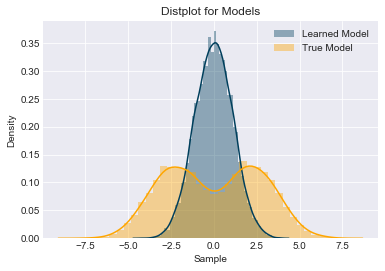

In [45]:
plot_models(p_model, q_model)

In [48]:
stats = train(p_model, q_model, AdversarialLoss, optimizer="RMSprop", 
              epochs=20000, lr=1e-3, batch_size=512)

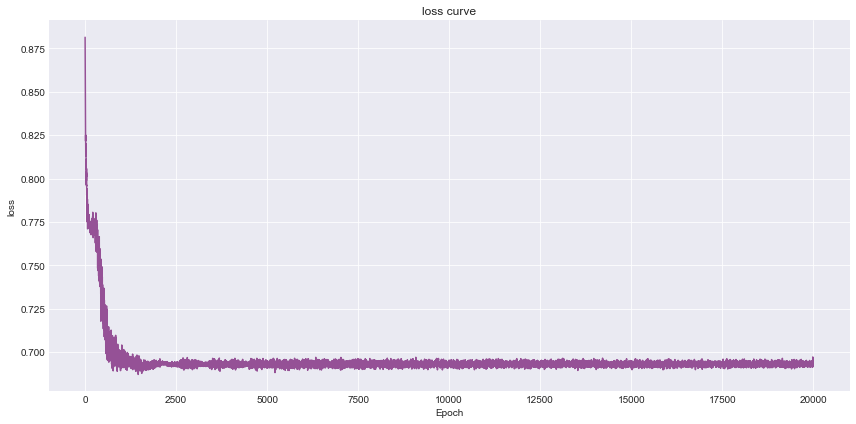

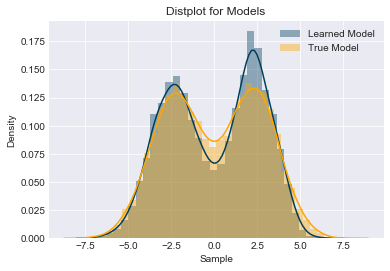

In [49]:
plot_stats(stats)
plot_models(p_model, q_model)